In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.utils import resample
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

df = pd.read_csv("data/train.csv", index_col=0)

In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


In [52]:
df.head(20)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S


In [53]:
# Get some info on the dataset distribution
df.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [54]:
df['Survived'].value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

# Data exploration

array([[<Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'SibSp'}>],
       [<Axes: title={'center': 'Parch'}>,
        <Axes: title={'center': 'Fare'}>]], dtype=object)

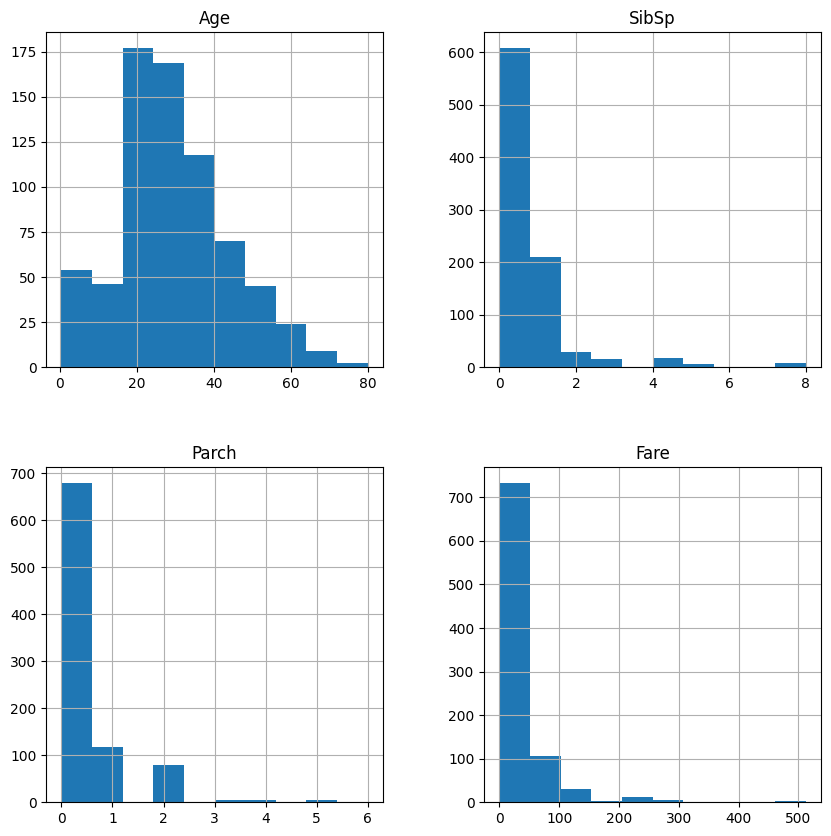

In [55]:
df_num = df[['Age','SibSp','Parch','Fare']]
df_cat = df[['Survived','Pclass','Sex','Ticket','Cabin','Embarked']]

#distributions for all numeric variables 
df_num.hist(figsize=(10, 10))


            Age     SibSp     Parch      Fare
Age    1.000000 -0.308247 -0.189119  0.096067
SibSp -0.308247  1.000000  0.414838  0.159651
Parch -0.189119  0.414838  1.000000  0.216225
Fare   0.096067  0.159651  0.216225  1.000000


<Axes: >

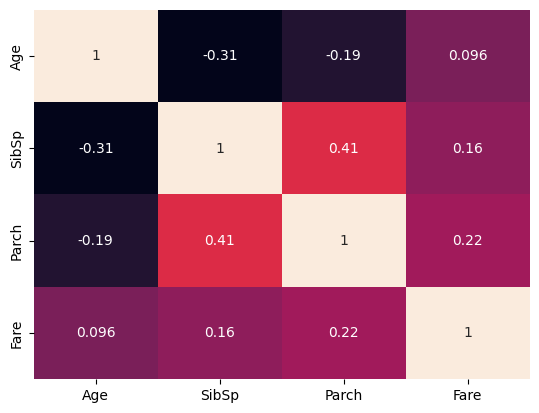

In [56]:
print(df_num.corr())
sns.heatmap(df_num.corr(), annot=True, cbar=False)

In [57]:
# compare survival rate across Age, SibSp, Parch, and Fare 
pd.pivot_table(df, index = 'Survived', values = ['Age','SibSp','Parch','Fare'])

,Age,Fare,Parch,SibSp
Survived,,,,
0,30.626179,22.117887,0.329690,0.553734
1,28.343690,48.395408,0.464912,0.473684


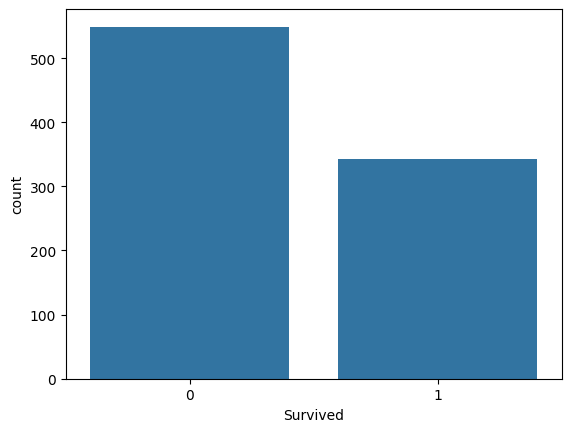

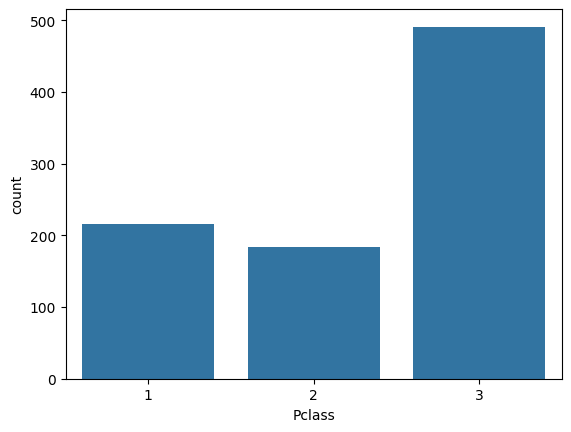

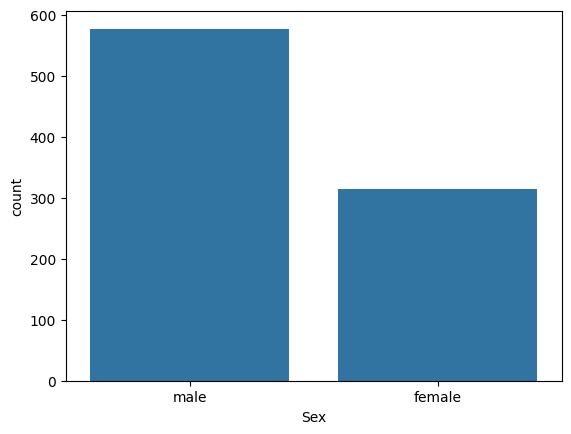

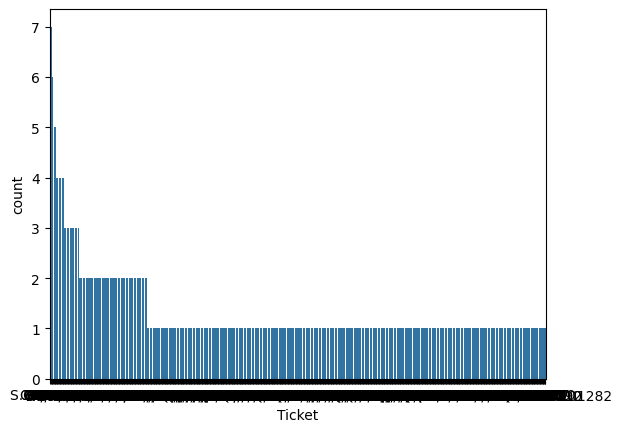

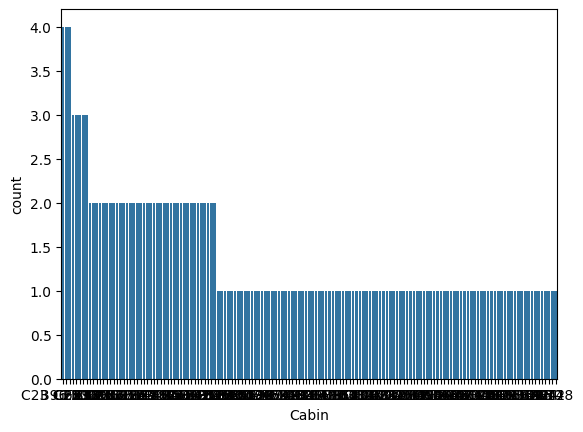

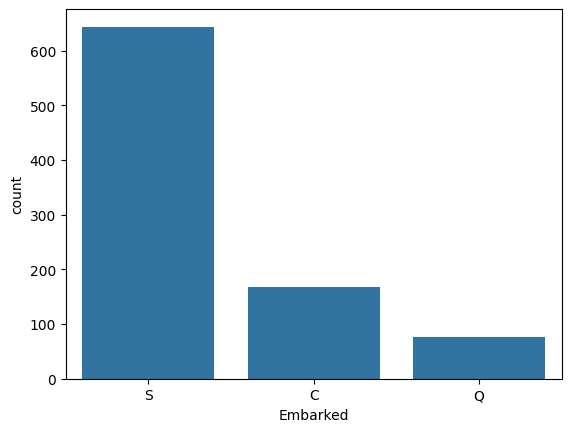

In [58]:
# We look at the categorical variables using barplots
for i in df_cat.columns:
    sns.barplot(x=df_cat[i].value_counts().index, y=df_cat[i].value_counts())
    plt.show()

In [59]:
# Comparing survival and each of these categorical variables 
# We count the number fror each variable using the Ticket variable to allow the count. Ticket is chosen here because each passenger has one and only one ticket
print(pd.pivot_table(df, index = 'Survived', columns = 'Pclass', values = 'Ticket' ,aggfunc ='count'))
print()
print(pd.pivot_table(df, index = 'Survived', columns = 'Sex', values = 'Ticket' ,aggfunc ='count'))
print()
print(pd.pivot_table(df, index = 'Survived', columns = 'Embarked', values = 'Ticket' ,aggfunc ='count'))

Pclass      1   2    3
Survived              
0          80  97  372
1         136  87  119

Sex       female  male
Survived              
0             81   468
1            233   109

Embarked   C   Q    S
Survived             
0         75  47  427
1         93  30  217


# Feature Engineering¶


In [60]:
# Some work needs to be done on cabin, name and ticket to see if those variables coud be useful
# After a quick study, we can tell that Name and Ticket variables can be dropped as they provide little information and the amount of data is limited

# We check here if someone booking several cabins could have an impact on their chance of survival 
df['cabin_multiple'] = df["Cabin"].apply(lambda x: 0 if pd.isna(x) else len(x.split(' ')))
# after looking at this, we may want to look at cabin by letter or by number. Let's create some categories for this 
# letters 
# multiple letters 
print(df['cabin_multiple'].value_counts())
pd.pivot_table(df, index = 'Survived', columns = 'cabin_multiple', values = 'Ticket' ,aggfunc ='count')

cabin_multiple
0    687
1    180
2     16
3      6
4      2
Name: count, dtype: int64


cabin_multiple,0,1,2,3,4
Survived,,,,,
0,481.0,58.0,7.0,3.0,NaN
1,206.0,122.0,9.0,3.0,2.0


In [61]:
#creates categories based on the cabin letter (n stands for null)
#in this case we will treat null values like it's own category

df['cabin_adv'] = df.Cabin.apply(lambda x: str(x)[0])

#comparing surivial rate by cabin
print(df.cabin_adv.value_counts())
pd.pivot_table(df,index='Survived',columns='cabin_adv', values = 'Name', aggfunc='count')

cabin_adv
n    687
C     59
B     47
D     33
E     32
A     15
F     13
G      4
T      1
Name: count, dtype: int64


cabin_adv,A,B,C,D,E,F,G,T,n
Survived,,,,,,,,,
0,8.0,12.0,24.0,8.0,8.0,5.0,2.0,1.0,481.0
1,7.0,35.0,35.0,25.0,24.0,8.0,2.0,NaN,206.0


# Data Preprocessing for Model¶

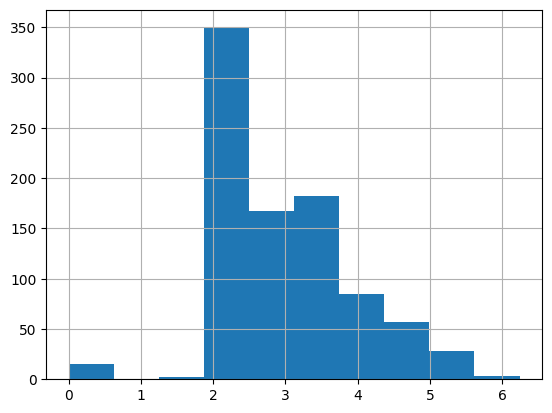

In [62]:
#create all categorical variables that we did above for both training and test sets 
df['cabin_multiple'] = df.Cabin.apply(lambda x: 0 if pd.isna(x) else len(x.split(' ')))
df['cabin_adv'] = df.Cabin.apply(lambda x: str(x)[0])
df['name_title'] = df.Name.apply(lambda x: x.split(',')[1].split('.')[0].strip())

#impute nulls for continuous data 
df.Age = df.Age.fillna(df.Age.median())
df.Fare = df.Fare.fillna(df.Fare.mean())

#drop null 'embarked' rows. Only 2 instances of this in training and 0 in test 
df.dropna(subset=['Embarked'],inplace = True)

df = df.drop('Ticket', axis=1)
df = df.drop('Name', axis=1)

# log norm of fare (used)
df['norm_fare'] = np.log(df.Fare+1)
df['norm_fare'].hist()

# converted Pclass to category for pd.get_dummies()
df.Pclass = df.Pclass.astype(str)

#created dummy variables from categories
df_dummies = pd.get_dummies(df)

In [63]:
# # Balance the training set
# majority_class = df[df['Survived'] == 0]
# minority_class = df[df['Survived'] == 1]

# # Oversample the minority class
# minority_class_0_oversampled = resample(minority_class, replace=True, n_samples=len(majority_class), random_state=52)

# # Concatenate oversampled minority classes with majority class
# df_balanced = pd.concat([majority_class, minority_class_0_oversampled])

# # Shuffle the balanced dataset
# df_balanced = df_balanced.sample(frac=1, random_state=42).reset_index(drop=True)

# df_balanced.head()
# df_balanced['Survived'].value_counts()
df_balanced = df

In [64]:
# Drop the Sex_female variable as it carries the same information as Sex_male
df_dummies = df_dummies.drop('Sex_female', axis=1)

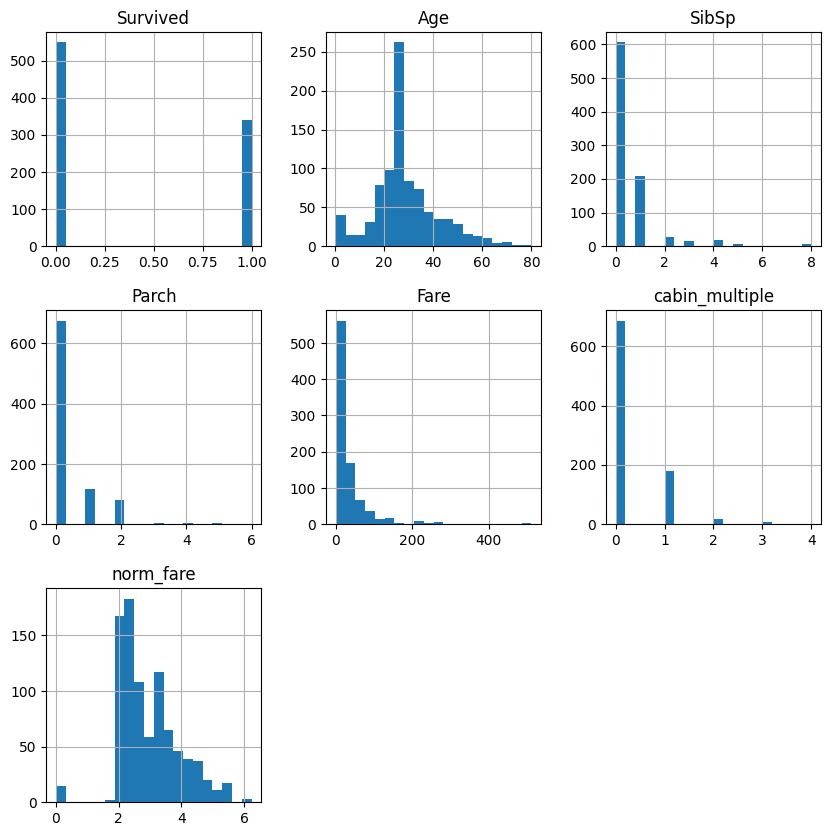

In [65]:
df_dummies.hist(bins=20, figsize=(10, 10))
plt.show()

In [66]:
Y = df_dummies['Survived']
X = df_dummies.drop('Survived', axis=1)
X.info()
Y.info()

<class 'pandas.core.frame.DataFrame'>
Index: 889 entries, 1 to 891
Columns: 185 entries, Age to name_title_the Countess
dtypes: bool(179), float64(3), int64(3)
memory usage: 204.0 KB
<class 'pandas.core.series.Series'>
Index: 889 entries, 1 to 891
Series name: Survived
Non-Null Count  Dtype
--------------  -----
889 non-null    int64
dtypes: int64(1)
memory usage: 13.9 KB


In [67]:
X_train, X_internal_eval, Y_train, Y_internal_eval = train_test_split(X, Y, test_size=0.20, random_state=42)

model = XGBClassifier()

model.fit(X_train, Y_train)

Y_internal_eval_pred = model.predict(X_internal_eval)

unique_labels, counts = np.unique(Y_internal_eval_pred, return_counts=True)

# Display the amount of each label predicted
for label, count in zip(unique_labels, counts):
    print(f'Label {label}: {count} occurrences')

Label 0: 108 occurrences
Label 1: 70 occurrences


In [ ]:
# Hyperparameter tuning

from sklearn.model_selection import GridSearchCV, KFold
from xgboost import XGBClassifier

kf = KFold(n_splits=5, shuffle=True, random_state=43)

# Hyperparameter grid to explore
# The gird has been changed several times to find the value for each hyperparameters
param_grids = [{
    'n_estimators': [100, 300, 500, 1000],
    'learning_rate': [0.01, 0.05, 0.1]},
    {
    'max_depth': [3, 5, 7, 9],
    'min_child_weight': [1, 3, 5],
    'gamma': [0, 0.1, 0.2, 0.4]},
    {
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0]},
    {
    'lambda': [1, 1.5, 2],
    'alpha': [0, 0.1, 1]
    }
]

for grid in param_grids:
    model = XGBClassifier()

    grid_search = GridSearchCV(model, grid, scoring='accuracy', cv=kf, verbose=1)

    grid_search.fit(X_train, Y_train)

    # Display the best hyperparameters found
    print("Meilleurs hyperparamètres :", grid_search.best_params_)

best_model = grid_search.best_estimator_

Y_internal_eval_pred = best_model.predict(X_internal_eval)

# Compute the accuracy when using the best hyperparameters
accuracy_internal = accuracy_score(Y_internal_eval, Y_internal_eval_pred)
print(f'Accuracy (Internal Evaluation): {accuracy_internal}')



Fitting 5 folds for each of 12 candidates, totalling 60 fits
Meilleurs hyperparamètres : {'learning_rate': 0.01, 'n_estimators': 1000}
Fitting 5 folds for each of 48 candidates, totalling 240 fits


In [ ]:
from xgboost import XGBClassifier
from sklearn.model_selection import cross_val_score, KFold

# Define the hyperparameters found previously
best_hyperparameters = {
    'n_estimators': 1000,
    'learning_rate': 0.01,
    'max_depth': 7,
    'min_child_weight': 3,
    'gamma': 0,
    'subsample': 0.8,
    'colsample_bytree': 0.6,
    'lambda': 2,
    'alpha': 0
}
model = XGBClassifier(**best_hyperparameters)

k = 5

# Initialize the k-fold cross validation
kf = KFold(n_splits=k, shuffle=True, random_state=39)

# Do the cross validation to make sure that our model and the hyperparameters works for different validation sets
scores = cross_val_score(model, X, Y, cv=kf, scoring='accuracy')

# Display the accuracy for each fold
for i, score in enumerate(scores, 1):
    print(f'Fold {i}: Accuracy = {score}')

# Display the average accuracy
print(f'Average accuracy: {scores.mean()}')

Fold 1: Accuracy = 0.8156424581005587
Fold 2: Accuracy = 0.8146067415730337
Fold 3: Accuracy = 0.8202247191011236
Fold 4: Accuracy = 0.8202247191011236
Fold 5: Accuracy = 0.8258426966292135
Average accuracy: 0.8193082669010107


# Inference on the evaluation dataset

In [19]:
X_eval = pd.read_csv("data/test.csv", index_col=0)

X_eval.isnull().sum()

X_eval = X_eval.drop('Name', axis=1)
X_eval = X_eval.drop('Cabin', axis=1)
X_eval = X_eval.drop('Ticket', axis=1)

X_eval['Pclass'] = X_eval['Pclass'].astype('category')
X_eval = pd.get_dummies(X_eval)
X_eval = X_eval.drop('Sex_female', axis=1)
X_eval.info()
X_eval.describe()

X_eval = X_eval.reindex(columns=X.columns, fill_value=0)

<class 'pandas.core.frame.DataFrame'>
Index: 418 entries, 892 to 1309
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Age         332 non-null    float64
 1   SibSp       418 non-null    int64  
 2   Parch       418 non-null    int64  
 3   Fare        417 non-null    float64
 4   Pclass_1    418 non-null    bool   
 5   Pclass_2    418 non-null    bool   
 6   Pclass_3    418 non-null    bool   
 7   Sex_male    418 non-null    bool   
 8   Embarked_C  418 non-null    bool   
 9   Embarked_Q  418 non-null    bool   
 10  Embarked_S  418 non-null    bool   
dtypes: bool(7), float64(2), int64(2)
memory usage: 19.2 KB


In [20]:
print("Colonnes de l'ensemble d'évaluation:", X_eval.columns)
print("Colonnes de l'ensemble d'entraînement:", df_dummies.columns)

Colonnes de l'ensemble d'évaluation: Index(['Age', 'SibSp', 'Parch', 'Fare', 'Pclass_1', 'Pclass_2', 'Pclass_3',
       'Sex_male', 'norm_fare'],
      dtype='object')
Colonnes de l'ensemble d'entraînement: Index(['Survived', 'Age', 'SibSp', 'Parch', 'Fare', 'Pclass_1', 'Pclass_2',
       'Pclass_3', 'Sex_male', 'norm_fare'],
      dtype='object')


In [21]:
model = XGBClassifier(**best_hyperparameters)
model.fit(X, Y)

XGBClassifier(alpha=0, base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.6, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=0, grow_policy=None,
              importance_type=None, interaction_constraints=None, lambda=2,
              learning_rate=0.05, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=7,
              max_leaves=None, min_child_weight=3, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=1000, ...)

In [22]:
predictions = model.predict(X_eval)

passenger_ids = X_eval.index
output = pd.DataFrame({
    'PassengerId': passenger_ids,
    'Survived': predictions
})

# Save to CSV
output_file_path = "predictions.csv"
output.to_csv(output_file_path, index=False)